In [30]:
import os
import requests
import time
import pandas as pd
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from fastcore.all import *
from duckduckgo_search import DDGS

In [32]:
from fastai.vision.all import *

In [ ]:
PATH_SET='cars_train'

In [3]:
def search_images(term, max_images=200):
     return DDGS().images(keywords=term, max_results=max_images)

In [4]:
def geturls(text,count=20):
    dict=DDGS().images(keywords=text, max_results=count)
    urls = []
    for i in dict:
        urls.append(i['image'])
    return urls


In [5]:
url1=geturls('new car')

In [15]:
url2=geturls('very old car')

In [10]:

def download_images(image_urls, subfolder_name):
    # Create the folder if it doesn't exist
    folder_path = os.path.join("cars_train", subfolder_name)
    os.makedirs(folder_path, exist_ok=True)

    # Download and save images
    for i, url in enumerate(image_urls):
        time.sleep(5)
        try:
            response = requests.get(url)
            if response.status_code == 200:
                with open(os.path.join(folder_path, f"image_{i}.jpg"), 'wb') as f:
                    f.write(response.content)
                print(f"Downloaded image {i+1}/{len(image_urls)}")
            else:
                print(f"Failed to download image {i+1}/{len(image_urls)} - Status code: {response.status_code}")
        except Exception as e:
            print(f"Failed to download image {i+1}/{len(image_urls)} - Error: {str(e)}")
         


In [11]:
download_images(url1,'new_cars')
    

Downloaded image 1/20
Downloaded image 2/20
Downloaded image 3/20
Downloaded image 4/20
Downloaded image 5/20
Downloaded image 6/20
Downloaded image 7/20
Downloaded image 8/20
Downloaded image 9/20
Downloaded image 10/20
Downloaded image 11/20
Downloaded image 12/20
Downloaded image 13/20
Downloaded image 14/20
Downloaded image 15/20
Downloaded image 16/20
Downloaded image 17/20
Downloaded image 18/20
Downloaded image 19/20
Downloaded image 20/20


In [16]:
download_images(url2, 'old_cars')

C:\Users\Aravind\anaconda3\Lib\site-packages\curl_cffi\aio.py:205: UserWarning: Curlm alread closed! quitting from process_data
  warnings.warn("Curlm alread closed! quitting from process_data")


Downloaded image 1/20
Downloaded image 2/20
Downloaded image 3/20
Downloaded image 4/20
Downloaded image 5/20
Downloaded image 6/20
Downloaded image 7/20
Downloaded image 8/20
Downloaded image 9/20
Downloaded image 10/20
Downloaded image 11/20
Downloaded image 12/20
Downloaded image 13/20
Downloaded image 14/20
Downloaded image 15/20
Downloaded image 16/20
Downloaded image 17/20
Downloaded image 18/20
Downloaded image 19/20
Downloaded image 20/20


In [18]:
DATASET_PATH='cars_train'

In [19]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)

In [20]:
class_names


['new_cars', 'old_cars']

In [21]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path= f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)


In [25]:
df=pd.DataFrame({'name':image_paths,
                'labels':labels})

In [26]:
df.to_csv(path_or_buf=f'{DATASET_PATH}/labels.csv', index=False)

In [33]:
dls=ImageDataLoaders.from_folder(path=DATASET_PATH,
                                item_tfms=Resize(1000),
                                bs=16,
                                batch_tfms=[Normalize.from_stats(*imagenet_stats),RandTransform()],
                                valid_pct=0.2
                                )

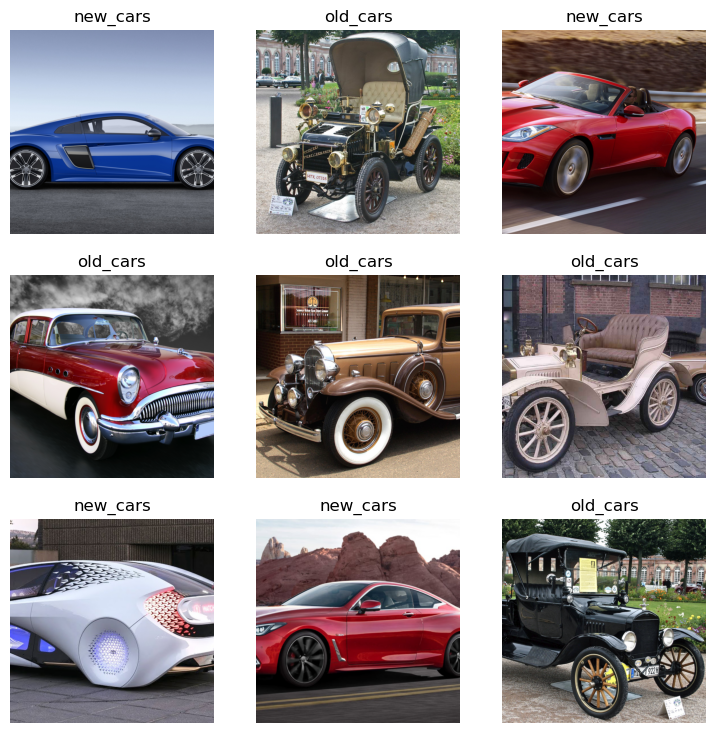

In [34]:
dls.show_batch()

In [35]:
model = vision_learner(dls=dls,arch=models.resnet18,metrics=[accuracy,error_rate])

In [36]:
model.fine_tune(epochs=1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.068689,0.314681,0.750000,0.250000,01:44


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.382196,0.083189,1.000000,0.000000,00:34


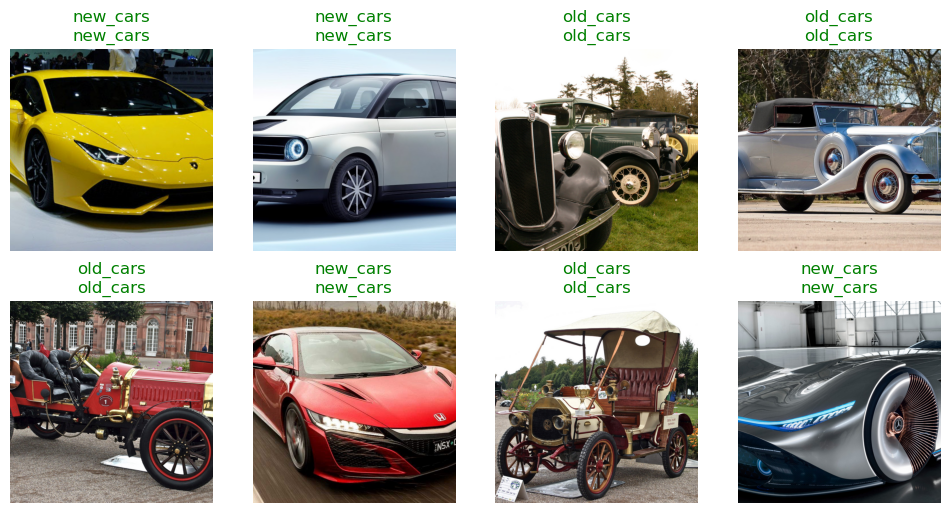

In [37]:
model.show_results()

In [ ]:
#test data
